Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:\
• Sex: male or female(Nominal)\
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral\
• Current Smoker: whether or not the patient is a current smoker (Nominal)\
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)\
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)\
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)\
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)\
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)\
• Tot Chol: total cholesterol level (Continuous)\
• Sys BP: systolic blood pressure (Continuous)\
• Dia BP: diastolic blood pressure (Continuous)\
• BMI: Body Mass Index (Continuous)\
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)\
• Glucose: glucose level (Continuous)
Predict variable (desired target)\
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)\
Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.
The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elimination approach is used here to remove those attributes with highest P-value one at a time followed by running the regression repeatedly until all attributes have P Values less than 0.05.
Feature Selection: Backward elimination (P-value approach)
Logistic regression equation
P=eβ0+β1X1/1+eβ0+β1X1P=eβ0+β1X1/1+eβ0+β1X1
When all features plugged in:
logit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucoselogit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucose

Interpreting the results: Odds Ratio, Confidence Intervals and P-values
• This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sexmale = 1)over that of females (sexmale = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.
• The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.
• Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.
• For Total cholesterol level and glucose level there is no significant change.

• There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.

Model Evaluation - Statistics
From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.
Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5
lower the threshold
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

Conclusions
• All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting significant role in the Heart disease prediction.

• Men seem to be more susceptible to heart disease than women. Increase in age, number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease

• Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading. Glucose too causes a very negligible change in odds (0.2%)

• The model predicted with 0.88 accuracy. The model is more specific than sensitive. Overall model could be improved with more data

Appendix
http://www.who.int/mediacentre/factsheets/fs317/en/
Data Source References
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import seaborn as sns

Data welcoming

In [4]:
#importer la data
data=pd.read_csv('data.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data['currentSmoker'].describe()

count    4238.000000
mean        0.494101
std         0.500024
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: currentSmoker, dtype: float64

spliting data usinf head() method

Logistic regression on currentSmoker and tenYearCHD

In [7]:
X_train=data['currentSmoker'].head(4000)
Y_train=data['TenYearCHD'].head(4000)
X_test=data['currentSmoker'].head(238)
Y_test=data['TenYearCHD'].head(238)

regression model recall

In [8]:
from sklearn.linear_model import LogisticRegression

In [8]:
Y_train=np.array(Y_train)
Y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
X_train=np.array(X_train)
X_train=X_train.reshape(-1, 1)

In [10]:
clf=LogisticRegression(random_state=0).fit(X_train,Y_train)

In [11]:
X_test=np.array(X_test).reshape(-1,1)

In [12]:
pred=clf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
clf.score(X_test,Y_test)

0.8025210084033614

In [14]:
Y_test

0      0
1      0
2      0
3      1
4      0
      ..
233    0
234    1
235    0
236    0
237    0
Name: TenYearCHD, Length: 238, dtype: int64

In [15]:
import sklearn
sklearn.metrics.accuracy_score(Y_test,pred)

0.8025210084033614

In [16]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous) Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

TAKING IN CONSIDERATION THE OTHER ENTERIES

In [17]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Medically, the total of cholésthérol is a key input, so let see the graphe of totCho

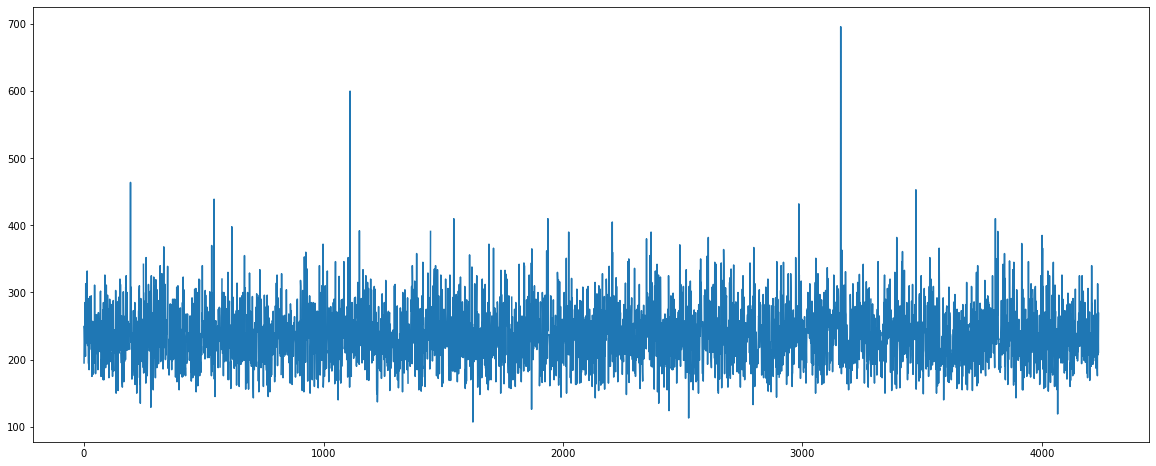

In [18]:
plt.figure(figsize=[20,8])
plt.plot(data['totChol'])

mean of totChol

In [19]:
#compute the mean of totChol
print('the mean value is:',data['totChol'].mean())

#put this value in missed pales
data['totChol']=data['totChol'].fillna(236.7215)
data['totChol'].isnull().sum()
data.isnull().sum()

the mean value is: 236.72158548233045


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

BMI

In [20]:
#mean od BMI
print(data['BMI'].mean())
#work on missed values usinf mean of BMI
data['BMI']=data['BMI'].fillna(25.8020)
data['BMI'].isnull().sum()
data.isnull().sum()

25.80200758473571


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

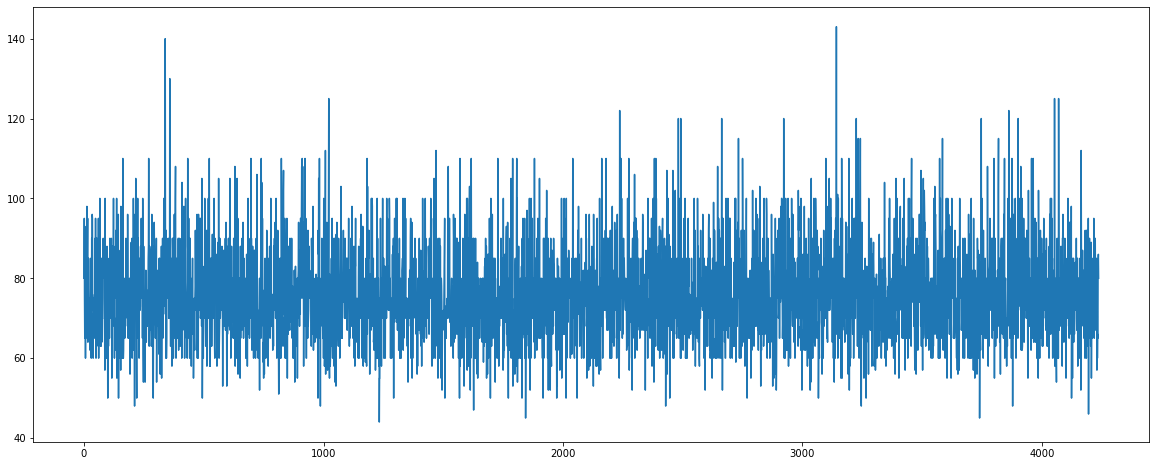

In [21]:
plt.figure(figsize=[20,8])
plt.plot(data['heartRate'])

HEART RATE

In [22]:
#HEART heart rate                                                                          -*(ràù)
data['heartRate'].describe()
#mean od heart rate
print(data['heartRate'].mean())
#work on missed values usinf mean of heart rate 
data['heartRate']=data['heartRate'].fillna(75.9168)
data['heartRate'].isnull().sum()
data.isnull().sum()


75.87892376681614


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

GLUCOSE

In [23]:
data['glucose'].mean()
#mean od heart rate
print(data['glucose'].mean())
#work on missed values usinf mean of heart rate 
data['glucose']=data['glucose'].fillna(75.9168)
data['glucose'].isnull().sum()
data.isnull().sum()


81.96675324675324


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [24]:
data['BPMeds'].mean()
#mean od heart rate
print(data['BPMeds'].mean())
#work on missed values usinf mean of heart rate 
data['BPMeds']=data['BPMeds'].fillna(0.02962962962962963)
data['BPMeds'].isnull().sum()
data.isnull().sum()

0.02962962962962963


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [25]:
data['cigsPerDay'].mean()
#mean od heart rate
print(data['cigsPerDay'].mean())
#work on missed values usinf mean of heart rate 
data['cigsPerDay']=data['cigsPerDay'].fillna(9.003088619624615)
data['cigsPerDay'].isnull().sum()
data.isnull().sum()

9.003088619624615


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

EDUCATION

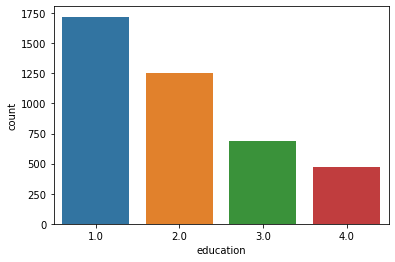

In [26]:
sns.countplot(x=data['education'],data=data)

In [27]:
#work on missed values usinf mean of heart rate 
data['education']=data['education'].fillna(1)
data['education'].isnull().sum()
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [28]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

SPLITING DATA

In [29]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [30]:
>>> from sklearn.model_selection import train_test_split

features=data.drop('TenYearCHD',axis=1)
features
X_train, x_test, Y_train, y_test = train_test_split(features,data['TenYearCHD'] , test_size=0.33, random_state=42)
x_test=np.array(x_test)


In [31]:
clf=LogisticRegression(random_state=0).fit(X_train,Y_train)
predi=clf.predict(x_test)
clf.score(x_test,y_test)

0.8556111508220158

In [32]:
import sklearn
sklearn.metrics.accuracy_score(predi,y_test)

0.8556111508220158

RESEAU DES NEURONES (using multilayer perceptron)

In [33]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs',alpha=0.001,hidden_layer_sizes=(8,8),random_state=1)
clf.fit(X_train,Y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(8, 8), random_state=1,
              solver='lbfgs')

In [34]:
found=clf.predict(x_test)
clf.score(x_test,y_test)

0.8556111508220158

In [35]:
from platform import python_version

print(python_version())

3.8.3


In [37]:
import pytorch

ModuleNotFoundError: No module named 'pytorch'